In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import torch.nn as nn
import numpy as np
from torch.autograd import Variable
import cv2
import torch
from net import *
import torchvision.transforms as transforms

In [ ]:
in_1 = np.random.randn(1,3,10,10)
in_ = Variable(torch.FloatTensor(in_1))

In [ ]:
conv = nn.Conv2d(3, 64, 3, padding=1)
deconv = nn.ConvTranspose2d(64, 3, 3, padding=1)
out_1 = conv(in_)
out_2 = deconv(out_1)
print(out_1.size(), out_2.size())

In [ ]:
out_2_data = out_2.data.numpy()[0]
out_2_data = np.rollaxis(out_2_data, 0, 3)
plt.imshow(out_2_data)

In [ ]:
maxpool = nn.MaxPool2d(2, stride=2, ceil_mode=True, return_indices=True)
unpool = nn.MaxUnpool2d(2, stride=2)
pool_out, indices = maxpool(in_)
unpool_out = unpool(pool_out, indices)

In [ ]:
unpool_out_data = unpool_out.data.numpy()[0]
unpool_out_data = np.rollaxis(unpool_out_data, 0, 3)
plt.imshow(unpool_out_data)

In [2]:
input_ = np.random.randn(1, 3, 404, 404)
input_ = Variable(torch.FloatTensor(input_))
mdl = fcn(pretrained=False, nb_class=37)
output = mdl(input_)

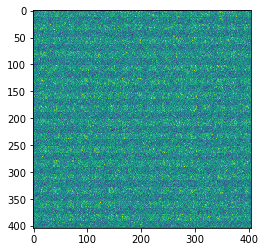

In [3]:
output_value, _ = torch.max(output, 1)
output_value = output_value.data.numpy()[0]
output_ = np.rollaxis(output_value, 0, 3)
plt.imshow(output_[:,:,0])